In [4]:
#number & amount of transactions before 2019
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#create a new instance of the bigquery client
from google.cloud import bigquery

client = bigquery.Client()

In [5]:
##number & amount of transactions before 2019 for weekend vs weekends
#assign a variable to the query called query

query = """

SELECT

   EXTRACT(year FROM o.datetime) as Year,(EXTRACT(DAYOFWEEK FROM o.datetime)=7 or EXTRACT(DAYOFWEEK FROM o.datetime)=1) AS Weekend, count(o.output_price) as transaction_count, ROUND(SUM(o.output_price)*(0.00000001),2) AS BTC
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,3600000))) AS hour, TIMESTAMP_MILLIS(CAST((timestamp) AS INT64)) as datetime,
    output.output_satoshis AS output_price
   FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY year,weekend
HAVING Year=2016 or Year=2017 or Year=2018
order by BTC DESC

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
transaction = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
transaction.head(10)

,Year,Weekend,transaction_count,BTC
0,2016,False,155551737,7.379922e+08
1,2017,False,196321229,6.960432e+08
2,2016,True,57235495,3.304058e+08
3,2017,True,71011596,2.365914e+08
4,2018,False,109643304,2.350139e+08
5,2018,True,36056795,7.357814e+07


In [6]:
#Difference in the number of transaction between weekends and weekdays in 2016 and 2017 was 223,625,875 (223M)

total_weekend2016=57235495+71011596

total_weekday2016=155551737+196321229

df_2016= total_weekday2016-total_weekend2016
print("total_weekday2016=",total_weekday2016)
print("total_weekend2016=",total_weekend2016)
print("difference in transaction count 2016=",df_2016)

total_weekday2016= 351872966
total_weekend2016= 128247091
difference in transaction count 2016= 223625875


In [7]:
#Difference in the number of transaction between weekends and weekdays in 2018 was 73,586,509 (73M)

total_weekend2018=36056795
total_weekday2018=109643304
df_2018=109643304-36056795
print("total_weekday2018=",total_weekday2018)
print("total_weekend2018=",total_weekend2018)
print("difference in transaction count 2018=",df_2018)

total_weekday2018= 109643304
total_weekend2018= 36056795
difference in transaction count 2018= 73586509


In [8]:
#Difference in the value of transaction between weekends and weekdays in 2016 and 2017 (867,038,266 BTC)

value_weekend2016=transaction.BTC[2]+transaction.BTC[3]
value_weekday2016=transaction.BTC[0]+transaction.BTC[1]
df_value2016=value_weekday2016-value_weekend2016
print("difference in values 2016=",df_value2016)



difference in values 2016= 867038266.6600001


In [9]:
#Difference in the value of transaction between weekends and weekdays in 2018 (161,435,798.93 BTC)

value_weekend2018=transaction.BTC[5]
value_weekday2018=transaction.BTC[4]
df_value2018=transaction.BTC[4]-transaction.BTC[5]
print("difference in values 2016=",df_value2018)

difference in values 2016= 161435798.93


In [10]:
# mean, variance, sd per week in 2016 and 2017

query = """

with daily_transactions as (
    select date(block_timestamp) as date, count(*) as count
    from `bigquery-public-data.crypto_bitcoin.transactions` as o
    group by date
)
select date_trunc(date, WEEK) as week,EXTRACT(year FROM date) as Year, cast(avg(count) as INT64) as mean, cast(variance(count) as INT64) as variance, cast(stddev(count) as INt64) as stddev
from daily_transactions

group by year,week
having year=2016 or year=2017
order by year,week

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
mv = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
mv.head(10)

,week,Year,mean,variance,stddev
0,2015-12-27,2016,136565,311151458.0,17639.0
1,2016-01-03,2016,175719,241100477.0,15527.0
2,2016-01-10,2016,184806,125191630.0,11189.0
3,2016-01-17,2016,205827,170724550.0,13066.0
4,2016-01-24,2016,218284,202219781.0,14220.0
5,2016-01-31,2016,211671,528904605.0,22998.0
6,2016-02-07,2016,215978,315307644.0,17757.0
7,2016-02-14,2016,213679,168905481.0,12996.0
8,2016-02-21,2016,216584,459913144.0,21446.0
9,2016-02-28,2016,244312,710224688.0,26650.0


In [36]:
# mean, variance, sd per week in 2018

query = """

with daily_transactions as (
    select date(block_timestamp) as date, count(*) as count
    from `bigquery-public-data.crypto_bitcoin.transactions` as o
    group by date
)
select date_trunc(date, WEEK) as week,EXTRACT(year FROM date) as Year, cast(avg(count) as INT64) as mean, cast(variance(count) as INT64) as variance, cast(stddev(count) as INt64) as stddev
from daily_transactions

group by year,week
having year=2018
order by week

"""
#execute query using the query method of our client instance and assign it to a variable 
query_job = client.query(query)

iterator = query_job.result(timeout=30)
#obtain a number of records using 
rows = list(iterator)

# Transform the rows into a panda dataframe
mv2018 = pd.DataFrame(data=[list(a.values()) for a in rows], columns=list(rows[0].keys()))
mv2018.head(10)

,week,Year,mean,variance,stddev
0,2017-12-31,2018,350877,3932709473,62711
1,2018-01-07,2018,332186,1329463207,36462
2,2018-01-14,2018,274556,1240265185,35217
3,2018-01-21,2018,233451,667022067,25827
4,2018-01-28,2018,224997,473655732,21764
5,2018-02-04,2018,197260,762979265,27622
6,2018-02-11,2018,181891,300939937,17348
7,2018-02-18,2018,181926,351732690,18755
8,2018-02-25,2018,192290,833060184,28863
9,2018-03-04,2018,190356,516048758,22717


In [37]:
mv.index= mv.week
#mv1 = mv.reset_index(drop=True)
#mv2018_1 = mv2018.reset_index(drop=True)
mv2018.index =mv2018.week

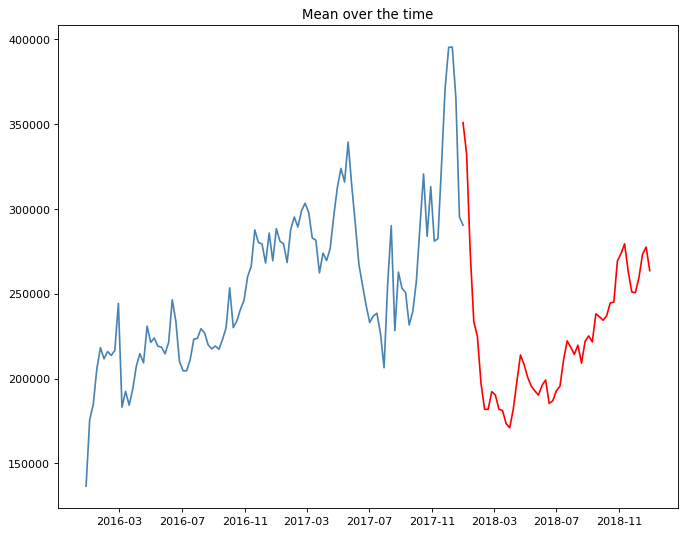

In [41]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(mv['mean'], label='Mean', color='steelblue')
plt.plot(mv2018['mean'], label='Mean', color='r')
plt.title('Mean over the time')
plt.show()

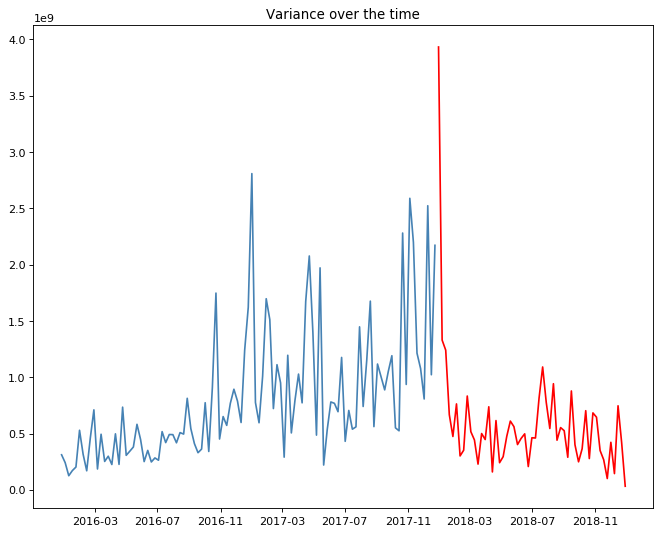

In [42]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(mv['variance'], label='variance', color='steelblue')
plt.plot(mv2018['variance'], label='variance', color='r')
plt.title('Variance over the time')
plt.show()

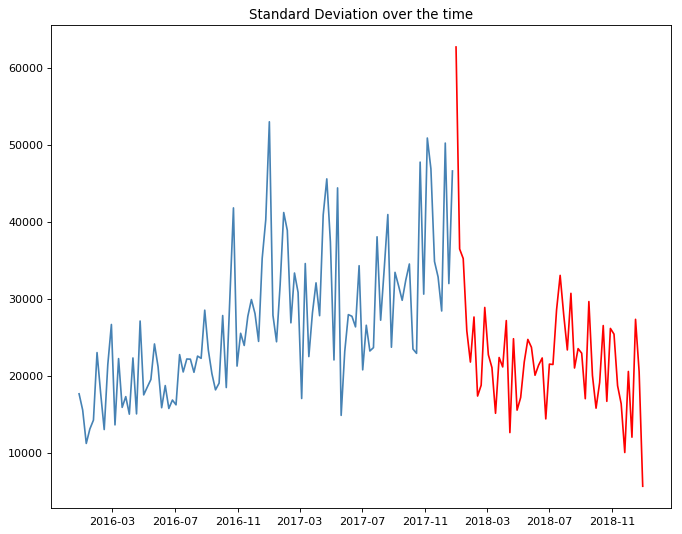

In [43]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(mv['stddev'], label='stddev', color='steelblue')
plt.plot(mv2018['stddev'], label='stddev', color='r')
plt.title('Standard Deviation over the time')
plt.show()